In [3]:
%matplotlib ipympl
import ipywidgets as widgets
from utilities import find_latest_file, setup_logging, cleanup_str
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.widgets as wg
import geopandas as gpd
import folium
log = setup_logging("JUP LOG")


RuntimeError: 'ipympl' is not a recognised GUI loop or backend name

In [2]:
df = find_latest_file("Full")
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=gpd.points_from_xy(x=df["Longitude"], y=df["Latitude"]))

In [3]:
# gdf.explore(markers="v", column="Year", )

In [4]:
gdf = gpd.read_file("pdf.geojson")
gdf.set_crs(epsg=4326, inplace=True, allow_override=True)
m = gdf.explore(fill=False, name="County Outlines", legend=True, )
folium.LayerControl().add_to(m)

"

In [5]:
def get_widget_data(year_range_slider, apple_names_p_drops, min_fair_threshold_dropdown):
    year_max = year_range_slider.value[1]
    year_min = year_range_slider.value[0]
    apple_names = []
    if not check_rand:
        for apple_dropdown in apple_names_p_drops:
            apple_names.append(apple_dropdown.value)
    else:
        apple_names = apple_names_p_drops

    df = find_latest_file("Full")

    df = df.merge(df.groupby("Year")["Event"].count().rename("Number of Events in a Year"), how="left", on="Year")

    df = df.loc[df["Number of Events in a Year"] >= min_fair_threshold_dropdown.value]

    if len(apple_names) > 0:
        df = df.loc[df["Use Name"].isin(apple_names)]

    nf = df.loc[df["Year"] <= year_max]
    nf = nf.loc[nf['Year'] >= year_min]

    if check_rand.value:
        nf = nf.loc[df["Use Name"].isin(nf.groupby("Use Name")["Year"].count().sort_values(ascending=False).head(number_of_apples.value).reset_index()["Use Name"])]

    for apple_name in apple_names:
        nf = nf.merge(nf.loc[nf["Use Name"] == apple_name].groupby("Year")["Event"].count().rename(f"# {apple_name} fair"), how="left", on="Year")
        nf[f"% in fairs"] = nf[f"# {apple_name} fair"] / nf["Number of Events in a Year"] * 100
    gdf = gpd.GeoDataFrame(nf, crs="EPSG:4326", geometry=gpd.points_from_xy(x=nf["Longitude"], y=nf["Latitude"]))
    return gdf

In [6]:
df = find_latest_file("Full")
year_slider = widgets.IntRangeSlider(min=df['Year'].min(), max=df['Year'].max(), value=[df['Year'].min(), df['Year'].max()])
number_of_apples = widgets.IntText(min=0, max=len(df["Use Name"].unique()), value=2, description="Number of apples")
min_fair_threshold = widgets.IntText(min=0, value=10, description="Fair Threshold")
check_rand = widgets.Checkbox(description="random", value=True)
display(year_slider, number_of_apples, min_fair_threshold, check_rand)

IntRangeSlider(value=(1838, 1957), max=1957, min=1838)

IntText(value=2, description='Number of apples')

IntText(value=10, description='Fair Threshold')

Checkbox(value=True, description='random')

In [7]:
def get_most_common_apples():
    nf = find_latest_file("Full")
    return nf.groupby("Use Name")["Year"].count().sort_values(ascending=False).head(number_of_apples.value).reset_index()["Use Name"]

In [74]:
apples_dropdowns = []
if not check_rand.value:
    for i in range(number_of_apples.value):
        apples_dropdowns.append(widgets.Dropdown(options=df["Use Name"].unique(), value="baldwin", description=f"Select Apple Type[{i + 1}]"))
    for dropdown in apples_dropdowns:
       display(dropdown)
else:
    apples_dropdowns = get_most_common_apples()

In [75]:
nf = get_widget_data(year_slider, apples_dropdowns, min_fair_threshold)
nf

County                            Event  Year  IsApple  \
0      androscoggin              androscoggin county  1906     True   
1      androscoggin              androscoggin county  1906     True   
2      androscoggin              androscoggin county  1906     True   
3      androscoggin              androscoggin county  1906     True   
4      androscoggin              androscoggin county  1906     True   
...             ...                              ...   ...      ...   
11834          york  york county farm bureau meeting  1925     True   
11835          york  york county farm bureau meeting  1925     True   
11836          york  york county farm bureau meeting  1925     True   
11837          york  york county farm bureau meeting  1925     True   
11838          york  york county farm bureau meeting  1925     True   

                 Given Name      Given Name Clean Old Alt Name  \
0                   Baldwin               baldwin          NaN   
1                 Ben Davis             ben davis          NaN   
2      Duchess of Oldenburg  duchess of oldenburg          NaN   
3           Harvey Greening       harvey greening       Harvey   
4            Fall Jenneting        fall jenneting          NaN   
...                     ...                   ...          ...   
11834           Gravenstein           gravenstein          NaN   
11835          McIntosh Red          mcintosh red          NaN   
11836          Northern Spy          northern spy          NaN   
11837             Delicious             delicious          NaN   
11838               Wealthy               wealthy          NaN   

          Old Presumed Name              Use Name Possibly Wrong Use Name  \
0                   Baldwin               baldwin                     NaN   
1                 Ben Davis             ben davis                     NaN   
2      Duchess of Oldenberg  duchess of oldenburg                     NaN   
3                       NaN           fall harvey                     NaN   
4            Fall Jenneting        fall jenneting                     NaN   
...                     ...                   ...                     ...   
11834                   NaN           gravenstein                     NaN   
11835                   NaN              mcintosh                     NaN   
11836                   NaN          northern spy                     NaN   
11837                   NaN         red delicious                     NaN   
11838                   NaN               wealthy                     NaN   

       ... # (pear) howell fair # nonesuch fair # president fair  \
0      ...                  NaN             1.0              1.0   
1      ...                  NaN             1.0              1.0   
2      ...                  NaN             1.0              1.0   
3      ...                  NaN             1.0              1.0   
4      ...                  NaN             1.0              1.0   
...    ...                  ...             ...              ...   
11834  ...                  2.0             NaN              NaN   
11835  ...                  2.0             NaN              NaN   
11836  ...                  2.0             NaN              NaN   
11837  ...                  2.0             NaN              NaN   
11838  ...                  2.0             NaN              NaN   

      # fletcher sweet fair # opalescent fair # wine fair # hyslop crab fair  \
0                       1.0               NaN         NaN                4.0   
1                       1.0               NaN         NaN                4.0   
2                       1.0               NaN         NaN                4.0   
3                       1.0               NaN         NaN                4.0   
4                       1.0               NaN         NaN                4.0   
...                     ...               ...         ...                ...   
11834                   1.0               3.0         NaN        

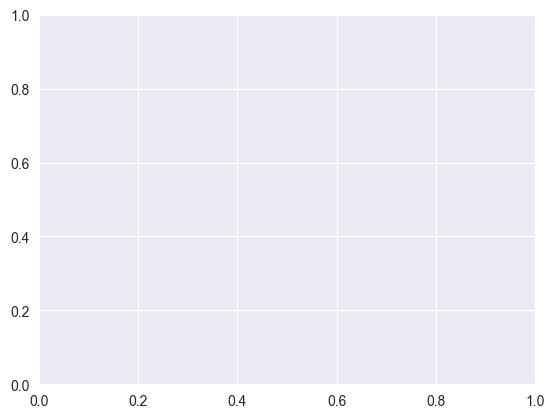

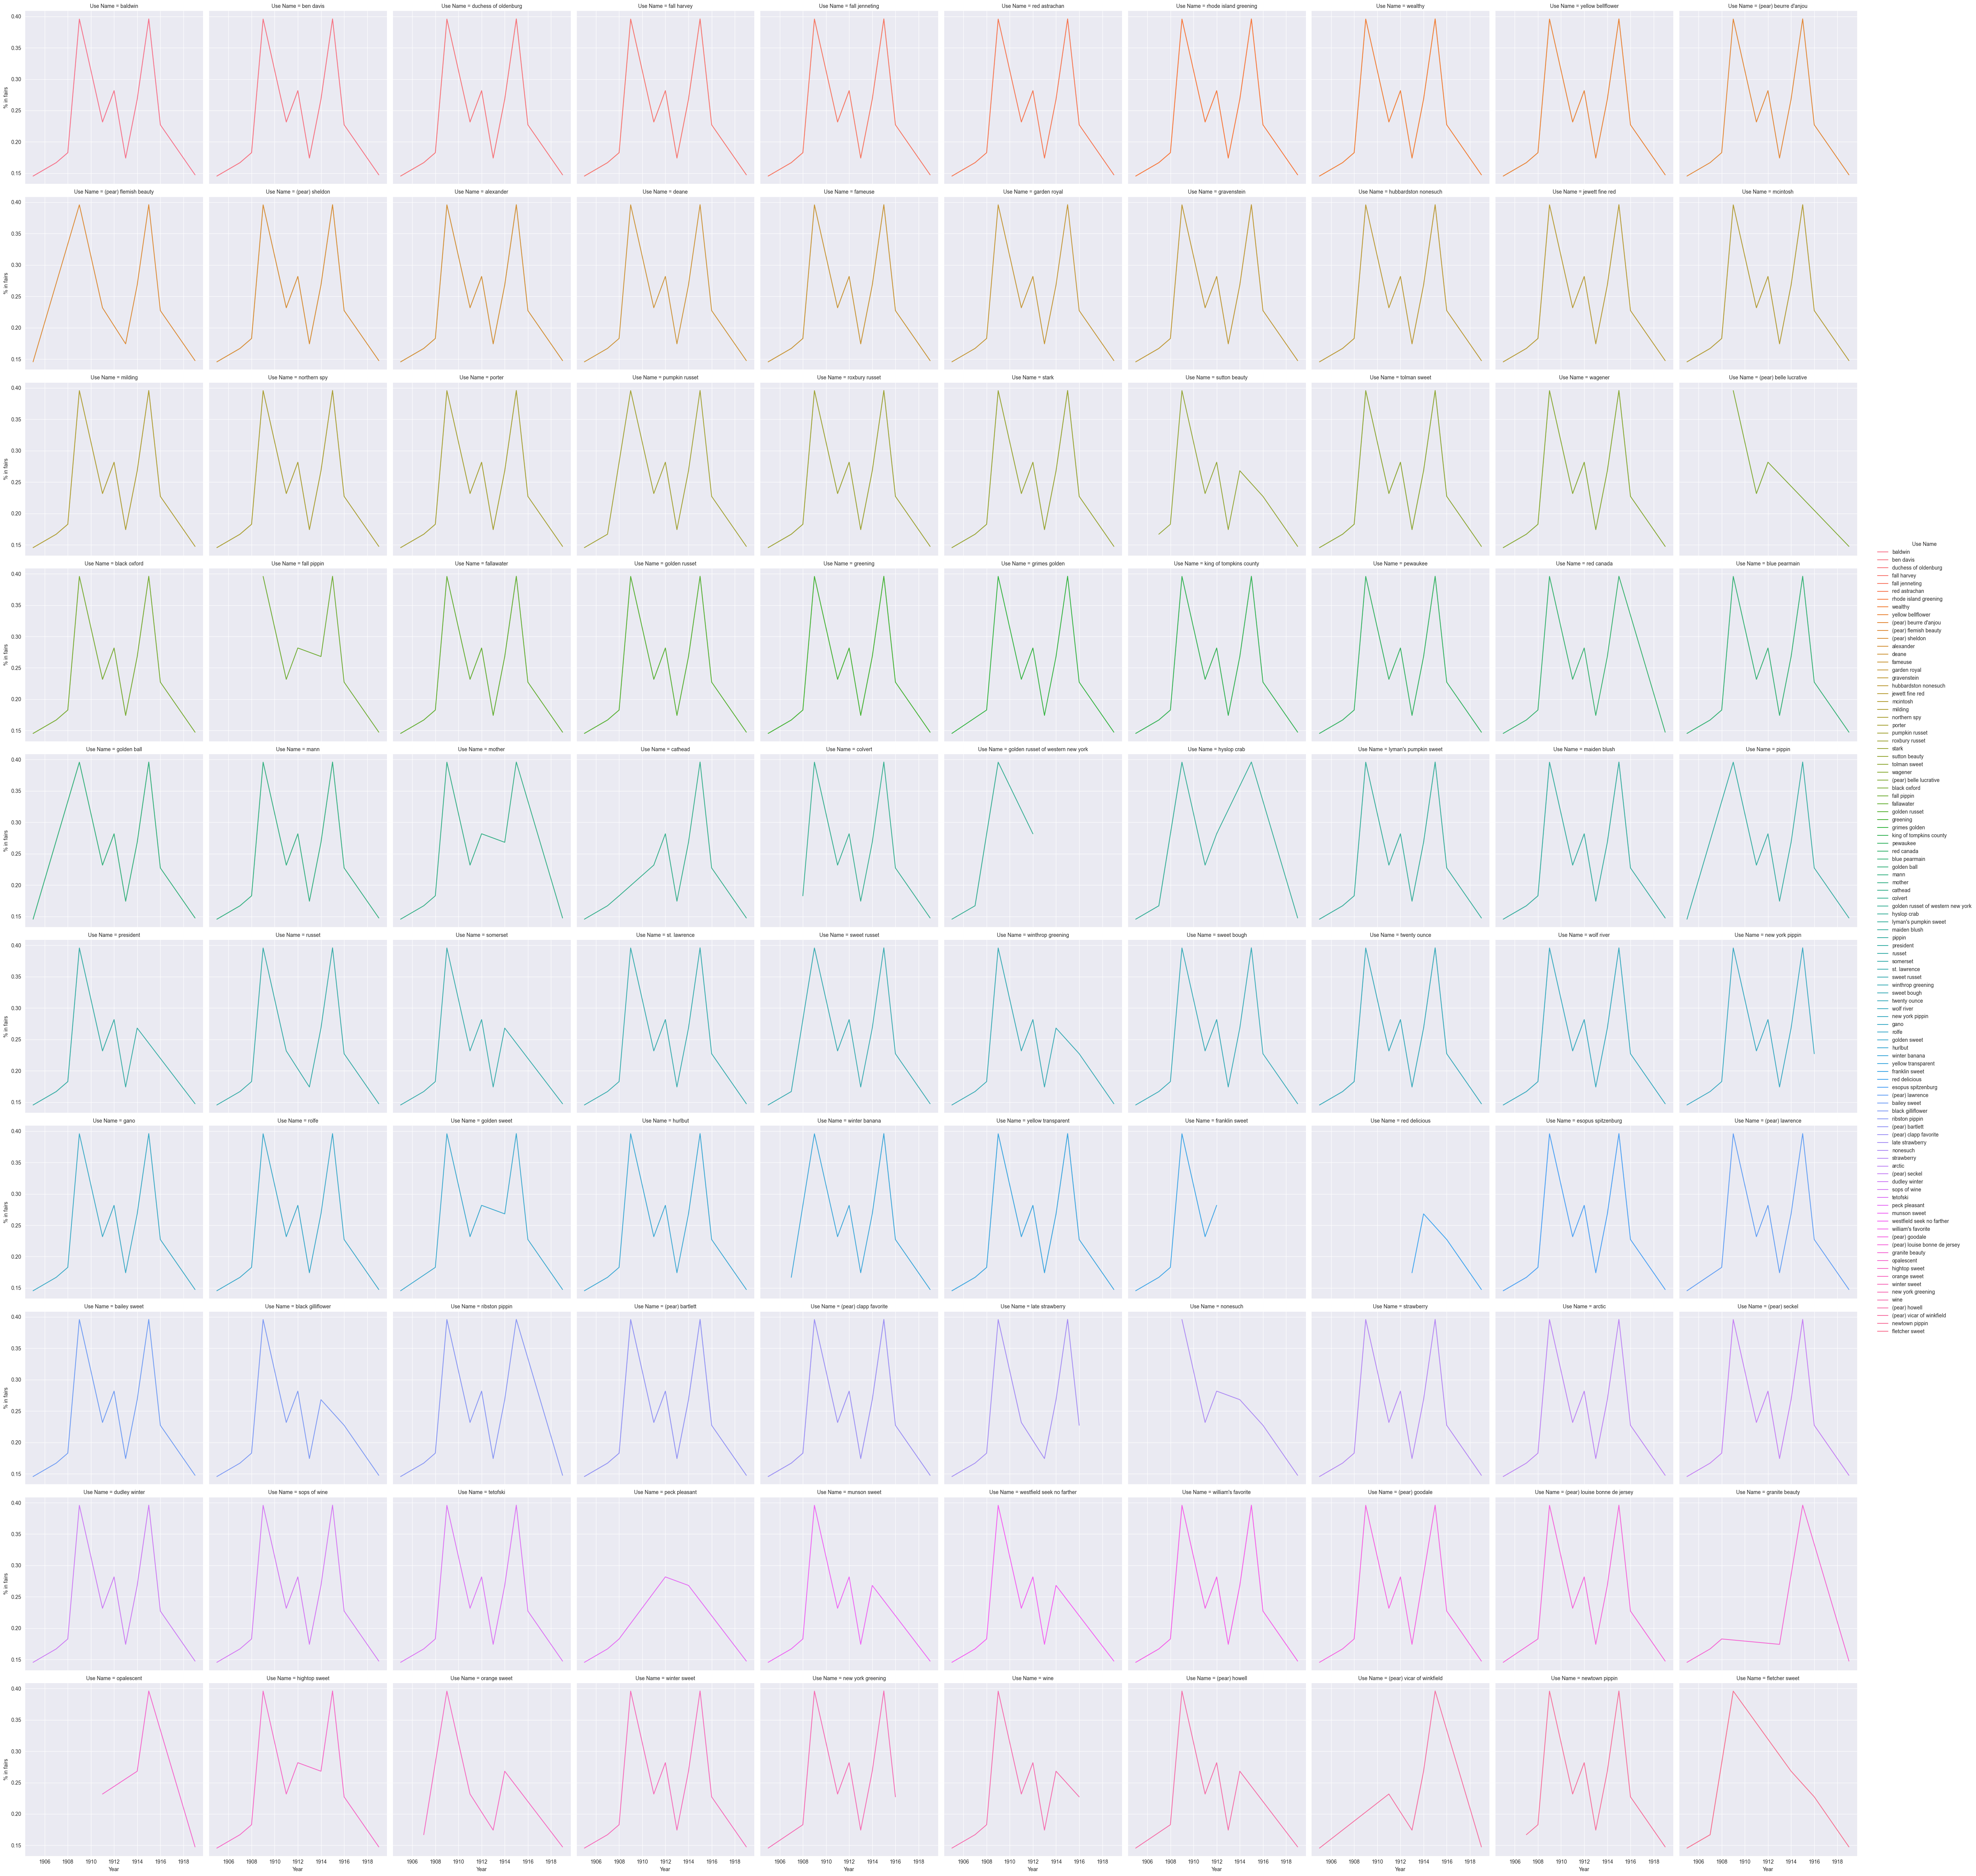

In [76]:
gdf = nf
plt.cla()
sns.relplot(x="Year", y=f"% in fairs",hue="Use Name", legend=True, data=gdf, kind="line", col="Use Name", col_wrap=10)
plt.show()

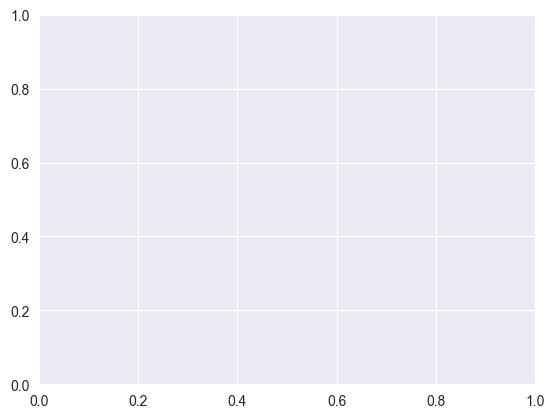

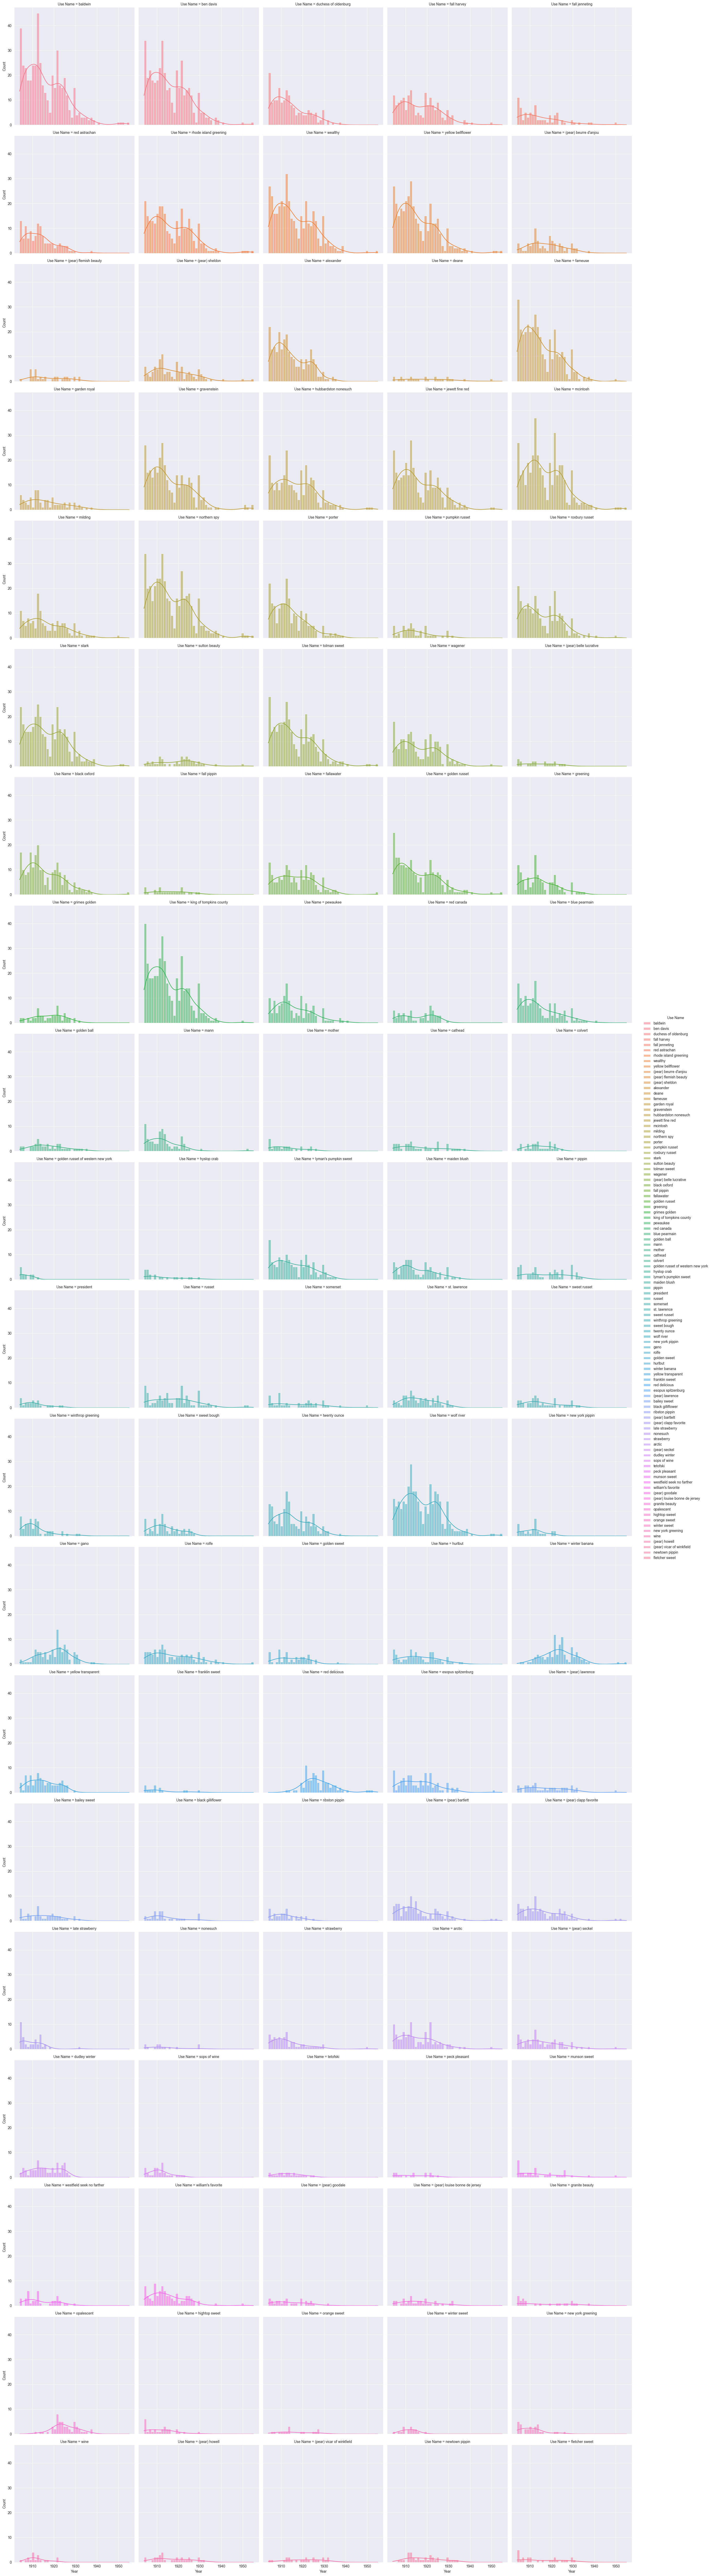

In [77]:
plt.cla()

sns.displot(nf, x="Year", kind="hist", kde=True, col="Use Name", col_wrap=5, hue="Use Name")

In [78]:
find_latest_file("Apples")

County                            Event  Year  IsApple  \
0      androscoggin              androscoggin county  1875    False   
1      androscoggin              androscoggin county  1875    False   
2      androscoggin              androscoggin county  1875    False   
3      androscoggin              androscoggin county  1875    False   
4      androscoggin              androscoggin county  1875    False   
...             ...                              ...   ...      ...   
27275          york  york county farm bureau meeting  1925     True   
27276          york  york county farm bureau meeting  1925     True   
27277          york  york county farm bureau meeting  1925     True   
27278          york  york county farm bureau meeting  1925     True   
27279          york  york county farm bureau meeting  1925     True   

                  Given Name       Given Name Clean Old Alt Name  \
0            (Pear) Bartlett        (pear) bartlett          NaN   
1      (Pear) Beurre d'Anjou  (pear) beurre d'anjou          NaN   
2           (Pear) Elizabeth       (pear) elizabeth          NaN   
3            (Pear) Napoleon        (pear) napoleon          NaN   
4              (Pear) Seckel          (pear) seckel          NaN   
...                      ...                    ...          ...   
27275              Delicious              delicious          NaN   
27276            Gravenstein            gravenstein          NaN   
27277           McIntosh Red           mcintosh red          NaN   
27278           Northern Spy           northern spy          NaN   
27279                Wealthy                wealthy          NaN   

      Alt Name Clean      Old Presumed Name    Presumed Name Clean  
0                NaN        (Pear) Bartlett        (pear) bartlett  
1                NaN  (Pear) Beurre d'Anjou  (pear) beurre d'anjou  
2                NaN       (Pear) Elizabeth       (pear) elizabeth  
3                NaN        (Pear) Napoleon        (pear) napoleon  
4                NaN          (Pear) Seckel          (pear) seckel  
...              ...                    ...                    ...  
27275            NaN                    NaN                    NaN  
27276            NaN                    NaN                    NaN  
27277            NaN                    NaN                    NaN  
27278            NaN                    NaN                    NaN  
27279            NaN                    NaN                    NaN  

[27280 rows x 10 columns]

In [80]:
pd.read_csv("cleanedData/Apples/apples_2025-08-23-15:55.csv")

County             Event  Year  IsApple             Given Name  \
0         knox       knox county  1867     True               Pearmain   
1         knox       knox county  1867     True                 Porter   
2         knox       knox county  1869    False  (Pear) Flemish Beauty   
3         knox       knox county  1869     True                Baldwin   
4         knox       knox county  1869     True            Fall Pippin   
...        ...               ...   ...      ...                    ...   
27275  lincoln  nobleboro grange  1921     True           Sweet Russet   
27276  lincoln  nobleboro grange  1921     True           Tolman sweet   
27277  lincoln  nobleboro grange  1921     True                Wealthy   
27278  lincoln  nobleboro grange  1921     True             Wolf River   
27279  lincoln  nobleboro grange  1921     True          York Imperial   

            Given Name Clean Old Alt Name Alt Name Clean Old Presumed Name  \
0                   pearmain          NaN            NaN               NaN   
1                     porter          NaN            NaN            Porter   
2      (pear) flemish beauty          NaN            NaN               NaN   
3                    baldwin          NaN            NaN           Baldwin   
4                fall pippin          NaN            NaN               NaN   
...                      ...          ...            ...               ...   
27275           sweet russet          NaN            NaN               NaN   
27276           tolman sweet          NaN            NaN               NaN   
27277                wealthy          NaN            NaN               NaN   
27278             wolf river          NaN            NaN               NaN   
27279          york imperial          NaN            NaN               NaN   

      Presumed Name Clean  
0                     NaN  
1                  porter  
2                     NaN  
3                 baldwin  
4                     NaN  
...                   ...  
27275                 NaN  
27276                 NaN  
27277                 NaN  
27278                 NaN  
27279                 NaN  

[27280 rows x 10 columns]

In [110]:
apples = find_latest_file("AppleNamesCleaned")
sources = find_latest_file("Sources")
sources["County"] = sources["County"].apply(lambda x: x.replace("county sources", "").strip())

In [111]:
apples

County                  Event  Year  IsApple       Given Name  \
0            oxford          oxford county  1912    False  (Pear) Adelaide   
1            oxford          oxford county  1916    False  (Pear) Adelaide   
2          kennebec  south kennebec county  1906    False    (Pear) Banfee   
3      androscoggin    androscoggin county  1875    False  (Pear) Bartlett   
4      androscoggin    androscoggin county  1877    False  (Pear) Bartlett   
...             ...                    ...   ...      ...              ...   
27275          york            york county  1851     True   York Russeting   
27276  androscoggin       pine tree grange  1904     True       York Sweet   
27277        oxford                 bethel  1862     True    York Sweeting   
27278       lincoln         lincoln county  1854     True       Zeal Apple   
27279      franklin  north franklin county  1899     True          Zylphia   

      Given Name Clean Old Alt Name Old Presumed Name         Use Name  \
0      (pear) adelaide          NaN               NaN  (pear) adalaine   
1      (pear) adelaide          NaN               NaN  (pear) adalaine   
2        (pear) banfee          NaN               NaN    (pear) banfee   
3      (pear) bartlett          NaN   (Pear) Bartlett  (pear) bartlett   
4      (pear) bartlett          NaN   (Pear) Bartlett  (pear) bartlett   
...                ...          ...               ...              ...   
27275   york russeting          NaN               NaN      york russet   
27276       york sweet          NaN               NaN       york sweet   
27277    york sweeting          NaN               NaN       york sweet   
27278       zeal apple          NaN               NaN       zeal apple   
27279          zylphia          NaN               NaN          zyplhia   

      Possibly Wrong Use Name Alt Presumed Names  \
0                         NaN                NaN   
1                         NaN                NaN   
2                         NaN                NaN   
3                         NaN                NaN   
4                         NaN                NaN   
...                       ...                ...   
27275                     NaN                NaN   
27276                     NaN                NaN   
27277                     NaN                NaN   
27278                     NaN                NaN   
27279                     NaN                NaN   

                          Alt Names                          Alt Given Names  
0                               NaN                          (pear) adelaide  
1                               NaN                          (pear) adelaide  
2                               NaN                            (pear) banfee  
3      (pear) williams bon chretien          (pear) barltett|(pear) bartlett  
4      (pear) williams bon chretien          (pear) barltett|(pear) bartlett  
...                             ...                                      ...  
27275                           NaN  york russet|york russeting|york russett  
27276                           NaN                 york sweet|york sweeting  
27277                           NaN                 york sweet|york sweeting  
27278                           NaN                               zeal apple  
27279                           NaN                                  zylphia  

[27280 rows x 13 columns]

In [112]:
sources

County                            Event  Year         Location  \
0     androscoggin              androscoggin county  1875              NaN   
1     androscoggin              androscoggin county  1877         lewiston   
2     androscoggin              androscoggin county  1878              NaN   
3     androscoggin              androscoggin county  1887              NaN   
4     androscoggin              androscoggin county  1899  livermore falls   
...            ...                              ...   ...              ...   
1253          york                      york county  1889             saco   
1254          york  york county farm bureau meeting  1919              NaN   
1255          york  york county farm bureau meeting  1921          sanford   
1256          york  york county farm bureau meeting  1923          sanford   
1257          york  york county farm bureau meeting  1925          sanford   

     Additional Notes                                          Source: 1  \
0                 NaN  lewiston evening journal|1875-10-06 00:00:00||...   
1                 NaN  lewiston evening journal|1877-10-02 00:00:00||...   
2                 NaN       maine farmer|1878-10-12 00:00:00|premiums||3   
3                 NaN  lewiston saturday journal|1887-10-08 00:00:00|...   
4                 NaN       maine farmer|1899-09-07 00:00:00|premiums||8   
...               ...                                                ...   
1253              NaN  biddeford daily journal|1889-09-17 00:00:00|pr...   
1254              NaN  biddeford weekly journal|1919-11-14 00:00:00|p...   
1255              NaN    sanford tribune|1921-11-04 00:00:00|premiums||1   
1256              NaN  sanford tribune|1923-11-08 00:00:00|premiums||...   
1257              NaN  biddeford weekly journal|1925-11-06 00:00:00|p...   

                                              Source: 2  \
0     lewiston evening journal|1875-10-07 00:00:00||...   
1     lewiston evening journal|1877-10-03 00:00:00|p...   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1253                                                NaN   
1254                                                NaN   
1255                                                NaN   
1256                                                NaN   
1257                                                NaN   

                                              Source: 3 Source: 4   Latitude  \
0                                                   NaN       NaN        NaN   
1     lewiston evening journal|1877-10-04 00:00:00|p...       NaN  44.095554   
2                                                   NaN       NaN        NaN   
3                                                   NaN       NaN        NaN   
4                                                   NaN       NaN  44.474669   
...                                                 ...       ...        ...   
1253                                                NaN       NaN  43.522208   
1254                                                NaN       NaN        NaN   
1255                                                NaN       NaN  43.443340   
1256                                                NaN       NaN  43.443340   
1257                                                NaN       NaN  43.443340   

      Longitude  
0           NaN  
1    -70.164923  
2           NaN  
3           NaN  
4    -70.174735  
...         ...  
1253 -70.453002  
1254        NaN  
1255 -70.776419  
1256 -70.776419  
1257 -70.776419  

[1258 rows x 11 columns]

In [114]:
apples.merge(sources, how="outer", indicator=True)

County                            Event  Year IsApple  \
0      androscoggin              androscoggin county  1875   False   
1      androscoggin              androscoggin county  1875   False   
2      androscoggin              androscoggin county  1875   False   
3      androscoggin              androscoggin county  1875   False   
4      androscoggin              androscoggin county  1875   False   
...             ...                              ...   ...     ...   
27278          york  york county farm bureau meeting  1925    True   
27279          york  york county farm bureau meeting  1925    True   
27280          york  york county farm bureau meeting  1925    True   
27281          york  york county farm bureau meeting  1925    True   
27282          york  york county farm bureau meeting  1925    True   

                  Given Name       Given Name Clean Old Alt Name  \
0            (Pear) Bartlett        (pear) bartlett          NaN   
1      (Pear) Beurre d'Anjou  (pear) beurre d'anjou          NaN   
2           (Pear) Elizabeth       (pear) elizabeth          NaN   
3            (Pear) Napoleon        (pear) napoleon          NaN   
4              (Pear) Seckel          (pear) seckel          NaN   
...                      ...                    ...          ...   
27278            Gravenstein            gravenstein          NaN   
27279           McIntosh Red           mcintosh red          NaN   
27280           Northern Spy           northern spy          NaN   
27281              Delicious              delicious          NaN   
27282                Wealthy                wealthy          NaN   

           Old Presumed Name               Use Name Possibly Wrong Use Name  \
0            (Pear) Bartlett        (pear) bartlett                     NaN   
1      (Pear) Beurre d'Anjou  (pear) beurre d'anjou                     NaN   
2           (Pear) Elizabeth       (pear) elizabeth                     NaN   
3            (Pear) Napoleon        (pear) napoleon                     NaN   
4              (Pear) Seckel          (pear) seckel                     NaN   
...                      ...                    ...                     ...   
27278                    NaN            gravenstein                     NaN   
27279                    NaN               mcintosh                     NaN   
27280                    NaN           northern spy                     NaN   
27281                    NaN          red delicious                     NaN   
27282                    NaN                wealthy                     NaN   

       ...                                    Alt Given Names Location  \
0      ...                    (pear) barltett|(pear) bartlett      NaN   
1      ...  (pear) anglo|(pear) anjon|(pear) anjou|(pear) ...      NaN   
2      ...          (pear) elizabeth|(pear) manings elizabeth      NaN   
3      ...                    (pear) napolean|(pear) napoleon      NaN   
4      ...  (pear) seckel|(pear) sekel|(pear) shekal|(pear...      NaN   
...    ...                                                ...      ...   
27278  ...  fall gravenstein|graveline|gravenstein|gravens...  sanford   
27279  ...  macintosh|macintosh red|mackintosh|mackintosh ...  sanford   
27280  ...  n. spy|n. y. spy|nathan spy|no. spy|northern s...  sanford   
27281  ...                            delicious|red delicious  sanford   
27282  ...         meallhy|wealthty|wealthy|wheatley|worthley  sanford   

      Additional Notes                                          Source: 1  \
0                  NaN  lewiston evening journal|1875-10-06 00:00:00||...   
1                  NaN  lewiston evening journal|1875-10-06 00:00:00||...   
2                  NaN  lewiston evening journal|1875-10-06 00:00:00||...   
3                  NaN  lewiston evening journal|1875-10-06 00:00:00||...   
4                  NaN  lewiston evening journal|1875-10-06 00:00:00||...   
...                ...                                 

In [101]:
n_apples = apples[["County","Event", "Year"]].drop_duplicates()
n_sources = sources[["County","Event", "Year"]].drop_duplicates()
n_apples

County                   Event  Year
0            oxford           oxford county  1912
1            oxford           oxford county  1916
2          kennebec   south kennebec county  1906
3      androscoggin     androscoggin county  1875
4      androscoggin     androscoggin county  1877
...             ...                     ...   ...
23907         waldo     south branch grange  1883
25090          york             york county  1849
26206          knox       north knox county  1908
26223          knox  pleasant valley grange  1907
26305         waldo   sheepscot lake grange  1947

[1258 rows x 3 columns]

In [106]:
n_sources["County"] = n_sources["County"].apply(lambda x: x.replace("county sources", "").strip())
n_sources

County                            Event  Year
0     androscoggin              androscoggin county  1875
1     androscoggin              androscoggin county  1877
2     androscoggin              androscoggin county  1878
3     androscoggin              androscoggin county  1887
4     androscoggin              androscoggin county  1899
...            ...                              ...   ...
1253          york                      york county  1889
1254          york  york county farm bureau meeting  1919
1255          york  york county farm bureau meeting  1921
1256          york  york county farm bureau meeting  1923
1257          york  york county farm bureau meeting  1925

[1258 rows x 3 columns]

In [109]:
n_apples.merge(n_sources, how="outer", indicator=True)

County                            Event  Year _merge
0     androscoggin              androscoggin county  1875   both
1     androscoggin              androscoggin county  1877   both
2     androscoggin              androscoggin county  1878   both
3     androscoggin              androscoggin county  1887   both
4     androscoggin              androscoggin county  1899   both
...            ...                              ...   ...    ...
1256          york                      york county  1889   both
1257          york  york county farm bureau meeting  1919   both
1258          york  york county farm bureau meeting  1921   both
1259          york  york county farm bureau meeting  1923   both
1260          york  york county farm bureau meeting  1925   both

[1261 rows x 4 columns]